In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup as bs
from PIL import Image
import re
from konlpy.tag import Okt

In [161]:


font_path = r"C:\Windows\Fonts\malgun.ttf"

# stopwords = [
#     "하지만",
#     "그리고",
#     "그런데",
#     "저는",
#     "제가",
#     "그럼",
#     "이런",
#     "저런",
#     "합니다",
#     "많은",
#     "많이",
#     "정말",
#     "너무",
#     "수",
#     "등",
#     "것",
#     "하다",
#     "되다",
#     "있다","으","기자","들","이"
# ]
stopwords = ["있다", "이", "것", "등", "들"]


def display_word_cloud(data, mask_img=None, width=1200, height=500):
    word_cloud = WordCloud(
        font_path=font_path,
        width=width,
        height=height,
        stopwords=stopwords,
        background_color="white",
        random_state=42,
        mask=mask_img,
    ).generate(data)

    plt.figure()
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [162]:
okt = Okt()


def okt_clean(text):
    clean_text = []
    okt_pos = okt.pos(text, stem=True)
    for txt, pos in okt_pos:
        if pos not in ["Josa", "Eomi", "Punctuation", "Verb"]:
            if len(txt) != 1:
                clean_text.append(txt)

    return " ".join(clean_text)

In [163]:
url = "https://news.naver.com/main/ranking/popularMemo.naver"

In [164]:
response = requests.get(url)


In [165]:
html = bs(response.text)
html

<!DOCTYPE HTML>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh"/>
<meta content="width=1106" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/home.naver" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_800x420_20221201.png" property="og:image"/>
<meta content="정치, 경제, 사회, 생활/문화, 세계, IT/과학 등 언론사별, 분야별 뉴스 기사 제공" property="og:description"/>
<meta content="네이버" property="og:article:author"/>
<meta content="summary" name="twitter:card"/>
<meta content="네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_8

In [166]:
news = html.find("div", class_="_officeCard _officeCard0").find_all(
    "a", class_="list_title nclicks('RBP.cmtnws')"
)
lst = []
# str(news[40]).split()[3].split("\"")[1]
for n in news:
    lst.append([n.text, str(n).split()[3].split('"')[1]])
    
len(news)

60

In [167]:
respose = requests.get("https://n.news.naver.com/article/022/0004035036?ntype=RANKING")
html = bs(response.text)
html.find("article", id="dic_area")
    

In [168]:
response = requests.get("https://n.news.naver.com/article/022/0004034999?ntype=RANKING")
html = bs(response.text)
html.find("article", id="dic_area").text.replace("\n", "").replace("\xa0","")

'“경찰 수사 7건…당에는 더 많은 제보 들어오는 중”“전문 킬러가 쓰는 저격 소총…지금 시기에 밀반입?”“25만원 민생회복지원금, 집권 후 재정 상황 살펴 판단”더불어민주당 중앙선거대책위원회 진성준 정책본부장은 13일 이재명 대선 후보암살 테러와 관련한 구체적인 제보가접수되고 있다고 밝혔다.    진 본부장은 이날 CBS라디오‘김현정의 뉴스쇼’에 나와“경찰이 암살 테러 제보 7건을 수사하고 있다”며“당에는 그보다 훨씬 많은 제보가 들어오고 있다”고 말했다.     더불어민주당 중앙선대위 진성준 정책본부장. 연합뉴스    ‘제보가 구체적이냐’는 사회자 질문에 진 본부장은“그렇다”며“저희 당의 김민석 수석최고위원을 중심으로 하는 테러대책TF를 운영하는 상황”이라고 설명했다.    진 본부장은 접수된 제보 중사거리가 2㎞에 달하는 저격용 ‘괴물 소총’이 밀반입됐다는 제보까지 있다고 전했다.    그는“그야말로 전문 킬러들이 쓰는 저격 소총”이라며“그런 소총들이 이 시기에 밀반입될 이유가 있는가”라며 우려했다.    진 본부장은“‘스탠딩 오더’(명령권자의 취소가 없는 한 끝까지 수행해야 할 명령)를 받은 특수부대 요원들이 있다”며“한 번지시하면 그것을 직접 취소하지 않는 한 계속 유효한 명령이라는 것”이라고 설명했다.    이어“주로 OB 요원으로,이미 군에서제대했지만 군과 관계를 갖고 그런 활동을 하는 요원들이 있는데 그들이 스탠딩 오더를 받고 있다는 제보가 진즉부터 접수돼 있다”고 부연했다.    진 본부장은 조세 정책과 관련해선“중산층의 세 부담을 낮추기 위한 합리적인 조세 개편이 필요하다”고 강조했다.    그는“우리 조세 체계는중산층에게 부담이 크게 가해지는 방식으로 오랫동안 유지됐다”며“이를테면 세원을 넓게 하되 부담은 줄여합리화하는 방식의 세제 개편을 통해재정을 조금 더 확보할 수 있는 방안도 있다”고 설명했다.    민주당이 주장해 온 ‘전 국민 25만원 민생회복지원금’ 지원을 이 후보가 집권할 경우바로 추진하는지를 묻는 말에는 “집권 후 재정 상황이

In [169]:
contents = []
for title, url in lst:
    respose = requests.get(url)
    html = bs(respose.text)
    content = (
        html.find("article", id="dic_area").text.replace("\n", "").replace("\xa0", "").replace("\t","").replace("\\","")
    )
    contents.append(content)

In [170]:
len(contents)
lst[-3]

['불타는 베란다에 매달려 버틴 10분…필사적으로 살아남은 고양이 [영상]',
 'https://n.news.naver.com/article/014/0005348677?ntype=RANKING']

In [171]:
data = pd.DataFrame(columns=["언론사명","순위","기사제목","기사링크","수집일자"])
url = "https://news.naver.com/main/ranking/popularMemo.naver"
html = requests.get(url)


In [172]:
soup = bs(html.content,"html.parser")

In [173]:
rankingnews_box_wrap = soup.find("div", class_="rankingnews_box_wrap")
rankingnews_box = rankingnews_box_wrap.find_all("div", class_="rankingnews_box")
rankingnews_list_ul = rankingnews_box[0].find("ul", class_="rankingnews_list")
rankingnews_list_li = rankingnews_list_ul.find_all("li")

len(rankingnews_list_li)


5

In [174]:
list_ranking_num = rankingnews_list_li[0].find("em", class_="list_ranking_num")
list_title = rankingnews_list_li[0].find("a", class_="list_title")

print(list_ranking_num.text, list_title.text)

1 [속보] '손자 사망' 강릉 차량 급발진 사고 운전자 패소… 법원 "페달 오조작 가능성"


In [175]:
rankingnews_name = rankingnews_box[0].find("strong", class_="rankingnews_name")
print(rankingnews_name.text)

한국일보


In [176]:
# 언론사 반복문
count = 1
for unlon in rankingnews_box:
    # print(count)
    # count += 1
    # 언론사 이름
    rankingnews_name = unlon.find("strong", class_="rankingnews_name").text
    # 언론사별 기사 링크 목록 5개
    rankingnews_list_ul = unlon.find("ul", class_="rankingnews_list")
    rankingnews_list_li = rankingnews_list_ul.find_all("li")
    # print(len(rankingnews_list_li))
    for news in rankingnews_list_li:
        # print(news.find("em", class_="list_ranking_num").text)
        list_ranking_num=news.find("em", class_="list_ranking_num").text
        # print(news.find("a", class_="list_title").text)
        list_title = news.find("a", class_="list_title")
        title = list_title.text
        url = list_title.attrs["href"]
        temp_df = pd.DataFrame({"언론사명": rankingnews_name, "순위": list_ranking_num,"기사제목":title,
                                "기사링크":url,"수집일자":"2025-05-13"},
                               index=["순위"])
        data = pd.concat([data,temp_df],ignore_index=True)

In [177]:
data.shape

(60, 5)

In [179]:
data.head(10)

,언론사명,순위,기사제목,기사링크,수집일자
0,한국일보,1,"[속보] '손자 사망' 강릉 차량 급발진 사고 운전자 패소… 법원 ""페달 오조작 가능성""",https://n.news.naver.com/article/469/000086440...,2025-05-13
1,한국일보,2,"진성준 ""이재명 암살 테러 7건 경찰 수사 중…사거리 2km 괴물 소총 밀반입 제보까지""",https://n.news.naver.com/article/469/000086440...,2025-05-13
2,한국일보,3,이재명 신고 하루 만에 품절...'대선 굿즈'로 떠오른 빨강파랑 운동화,https://n.news.naver.com/article/469/000086439...,2025-05-13
3,한국일보,4,"""누구 위해 사나""... 벤츠 타고 호텔 조식 먹는 80세 선우용여",https://n.news.naver.com/article/469/000086435...,2025-05-13
4,한국일보,5,"""왜 우리 애한테 안 웃어줘요?"" 교사에 '전화 폭탄'···초등 교권 침해 늘었다",https://n.news.naver.com/article/469/000086439...,2025-05-13
5,JTBC,1,"'윤 탈당 문제'에 김문수 ""하느냐 안 하느냐는 본인 뜻""",https://n.news.naver.com/article/437/000044056...,2025-05-13
6,JTBC,2,"""포항 지진, 국가 배상책임 없다""…항소심서 판결 뒤집혀",https://n.news.naver.com/article/437/000044056...,2025-05-13
7,JTBC,3,"프랑스 EU위원, 체코 정부에 ""한수원 원전 계약 중단하라""",https://n.news.naver.com/article/437/000044055...,2025-05-13
8,JTBC,4,"마크롱, 정상들 만난 자리서 '마약 휴지' 쓰윽?…엘리제궁 즉각 [소셜픽]",https://n.news.naver.com/article/437/000044054...,2025-05-13
9,JTBC,5,"경기 이천 대형 물류창고서 불…""대피인원 178명으로 늘어""",https://n.news.naver.com/article/437/000044056...,2025-05-13


In [180]:
" ".join (data["기사제목"].to_list())

'[속보] \'손자 사망\' 강릉 차량 급발진 사고 운전자 패소… 법원 "페달 오조작 가능성" 진성준 "이재명 암살 테러 7건 경찰 수사 중…사거리 2km 괴물 소총 밀반입 제보까지" 이재명 신고 하루 만에 품절...\'대선 굿즈\'로 떠오른 빨강파랑 운동화 "누구 위해 사나"... 벤츠 타고 호텔 조식 먹는 80세 선우용여 "왜 우리 애한테 안 웃어줘요?" 교사에 \'전화 폭탄\'···초등 교권 침해 늘었다 \'윤 탈당 문제\'에 김문수 "하느냐 안 하느냐는 본인 뜻" "포항 지진, 국가 배상책임 없다"…항소심서 판결 뒤집혀 프랑스 EU위원, 체코 정부에 "한수원 원전 계약 중단하라" 마크롱, 정상들 만난 자리서 \'마약 휴지\' 쓰윽?…엘리제궁 즉각 [소셜픽] 경기 이천 대형 물류창고서 불…"대피인원 178명으로 늘어" 이재명 지지 선언한 홍준표 지지자들..."국힘, 보수정당 자격 없어"  [지금이뉴스] "전청조, 임신한 척 좋은 대우 받아"...교도소에서도 사기 행각 [현장영상+] 김문수 "대통령 되자마자 울산에 특별예산 5천억 지원" 백종원, 김재환 PD 폭로에 작심 발언 "이젠 좌시하지 않겠다" 스타벅스 닉네임 이재명·김문수 \'사용불가\'..."금지 조치" 홍준표 지지자들, 이재명 지지 선언…"洪 없는 국힘 희망 없다" "이재명 나라에서 한번 살아봐라"…홍준표, SNS 글 삭제 "뱀파이어냐" 깜짝…\'93세\' 이길여 가천대 총장 근황 \'화제\' 한동훈 "김문수, 尹 부부 절연하고 탄핵 반대 사과하라" [속보] \'손자 사망\' 급발진 소송서 운전자 패소…법원 "페달 오조작" [단독]민주 ‘여성 출산 가산점’ 언급한 의원 징계 검토 축의금 8만원 내고 4인가족 식사…무례로 느끼면 야박한가?[e글e글] 불쑥 뛰어든 여성 못 피한 자전거…누가 가해자일까?(영상) ‘늑대소녀’로 불린 태국 20대, 시술로 말끔해진 얼굴 공개 이천 대형 물류센터 화재…대응 2단계 발령 \'내일\' 출석 통보‥거부하면 체포영장도 검토 \'공수처 1호 기소\' 뇌물 수수 혐의

In [181]:
news_clean = okt_clean(" ".join(data["기사제목"].to_list()))

In [182]:
news_clean = re.findall("[\w]{3,}",news_clean)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\user\AppData\Local\Temp\ipykernel_13124\4071945725.py:1: SyntaxWarning: invalid escape sequence '\w'
  news_clean = re.findall("[\w]{3,}",news_clean)


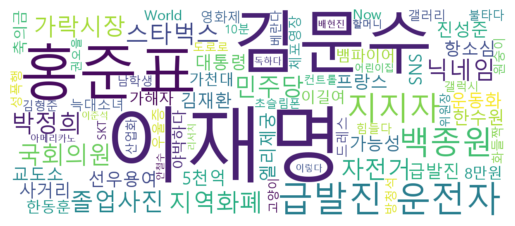

In [183]:
display_word_cloud(" ".join(news_clean))